Practice notebook for homework 2
DAta:https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

Project plan:
Prepare data and Exploratory Data Analysis(EDA)
Use linear regression for predicting price
Understanding the internals of linear regression
Evaluating the model with RMSE
Feature engineering
Regularization
Using the model

Module 2: Regression
2.1,2.2 Data preparation
Loading data and get an overview

In [1]:
!pip install pandas numpy



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

#import libraries
import pandas as pd
import numpy as np

#reading csv file
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

#getting first overview after downloading
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.columns

# sometimes the columns have underscores , sometimes not,sometimes the columns have capital letters, sometimes not

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [16]:
# len(df)
# df.isnull().sum()
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [ ]:
# Pandas DataFrame has a field called columns, 
# that contains the name of the columns
# columns is an index, that is a special data structure 
df.columns=df.columns.str.lower().str.replace(' ','_')
df.head()
# 



,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#Actually we have the same problems with the values. Before we can apply that, we need to detect all string columns,
#because the str function works only on strings.
df.dtypes


# strings
# 

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
## to select only the object
df.dtypes=='object'
# strings=list(df.dtypes[df.dtypes=='object'].index)

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [8]:
# The output of the last line of code in the last snippet are the values and the index of the series.
# We’re not interested in values here, but we’re interested in the names.
# Get access to the index of that series 
# Converting it to a python list with name strings
strings= list(df.dtypes[df.dtypes=='object'].index)
strings



['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

Similar to what we’ve done with the column names we want to apply to the specified columns.

In [10]:
df['make'].str.lower().str.replace(' ','_')

# Applying this to all the columns
for col in strings:
     df[col]=df[col].str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [28]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


2.3 EDA (Exploratory Data analysis)

In [13]:
# Getting an overview
for col in df.columns:
    print(col)
    #content of the column
    print(df[col].head())
    print()
    

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [15]:
for col in df.columns:
    print(col)
    print(df.columns.nunique())
    print("number of unique values: ", df[col].nunique())
    print()

make
16
number of unique values:  48

model
16
number of unique values:  914

year
16
number of unique values:  28

engine_fuel_type
16
number of unique values:  10

engine_hp
16
number of unique values:  356

engine_cylinders
16
number of unique values:  9

transmission_type
16
number of unique values:  5

driven_wheels
16
number of unique values:  4

number_of_doors
16
number of unique values:  3

market_category
16
number of unique values:  71

vehicle_size
16
number of unique values:  3

vehicle_style
16
number of unique values:  16

highway_mpg
16
number of unique values:  59

city_mpg
16
number of unique values:  69

popularity
16
number of unique values:  48

msrp
16
number of unique values:  6049



In [16]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Distribution of price
Visualize of price column

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn  as sns

#Display the plots in notebook
%matplotlib inline


<Axes: xlabel='msrp', ylabel='Count'>

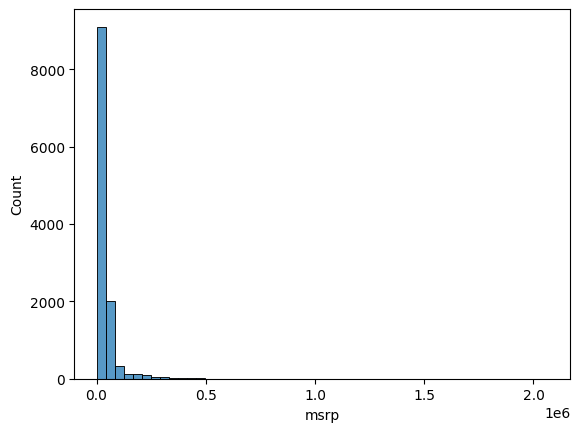

In [20]:
sns.histplot(df.msrp,bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

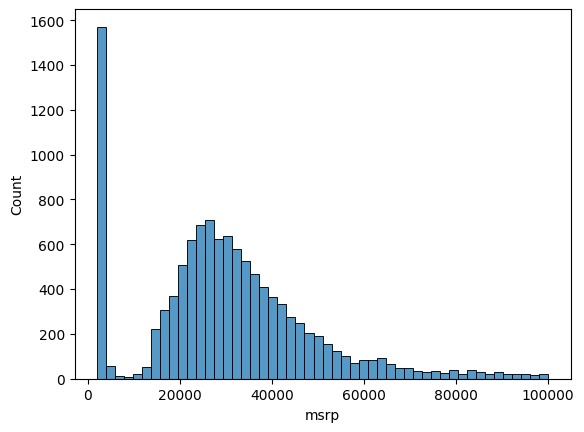

In [19]:
#bins : number of bars in the histogram
#in the diagram 1e6 means 10^6  = 1000000
sns.histplot(df.msrp[df.msrp<100000],bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

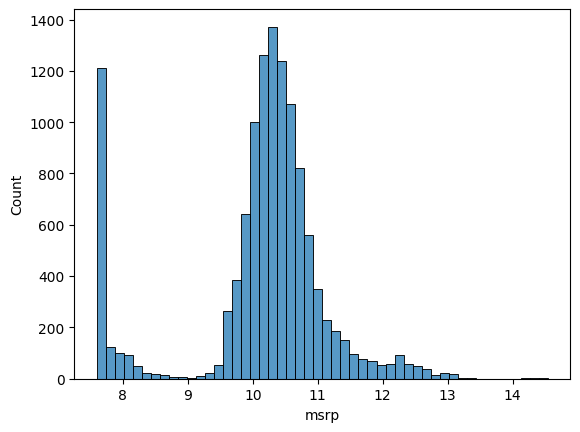

In [21]:
price_logs= np.log1p(df.msrp)
sns.histplot(price_logs,bins=50)

In [ ]:
# Missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [ ]:
# Random checks unrelated to the course
import numpy as np

x = np.array([1, np.e, np.e**2, 10])
print(np.log(x))


[0.         1.         2.         2.30258509]


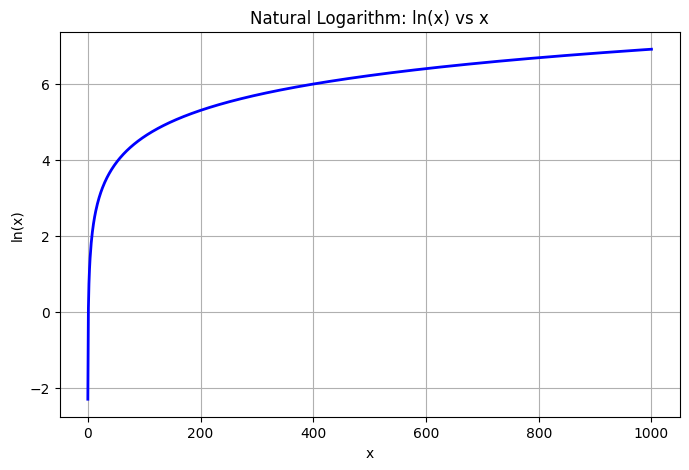

In [ ]:
# Random checks unrelated to the course
import numpy as np
import matplotlib.pyplot as plt

# Create an array of numbers from 0.1 to 1000
x = np.linspace(0.1, 1000, 1000)  # start at 0.1 to avoid ln(0)
y = np.log(x)  # natural log

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, color='blue', linewidth=2)
plt.title("Natural Logarithm: ln(x) vs x")
plt.xlabel("x")
plt.ylabel("ln(x)")
plt.grid(True)
plt.show()


2.4 Setting up validation framework

In [ ]:



#returns the number of records of the whole dataset
n= len(df)
n

# n_val = int(n*0.2)
# n_test = int(n*0.2)
# n_train = int( n-n_val-n_test)
# n,n_val,n_test,n_train


11914

In [26]:
#calculate 20% of the whole dataset
int(len(df)*0.2)

2382

In [27]:
#splitting the dataset into Train,Validation & Test
# Where Train dataset(60%) is  not calculated by total rows *.6,but the remaining of total-val-test
#n=11914,2382, 2382, 7150(train)

n = len(df)
n_val = n_test = int(n * 0.2)
n_train= n-n_val-n_test
n, n_val+n_test+n_train

(11914, 11914)

In [28]:
#size of dataframes
n,n_val,n_test,n_train

(11914, 2382, 2382, 7150)

In [29]:
# df_val= df.iloc[:n_val]
# df_test = df.iloc[n_val:n_val+n_test]
# df_train = df.iloc[n_test:]
# df_train df_test df_val
# Shuffle
# df_train= df.iloc[n_train:]
# df_val= df.iloc[n_train:n_train+n_val]
# df_test = df.iloc[n_val+n_test:]
df_train= df.iloc[:n_train]
df_val=df.iloc[n_train:n_train+n_val]
df_test= df.iloc[n_train+n_val:]

In [31]:
idx=np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [33]:
np.random.shuffle(idx)
idx

array([8152, 1671, 9185, ..., 3626, 1191, 8828], shape=(11914,))

In [34]:
#create shuffled datasets witch correct size
# idx=np.arange(n)
np.random.seed(2)
# np.random.shuffle(idx)

df_train= df.iloc[idx[:n_train]]
df_val= df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

len(df),len(df_train),len(df_test),len(df_val)

(11914, 7150, 2382, 2382)

In [77]:
2382+ 7150+ 2382

11914

In [84]:
# reset index
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [35]:
#log
y_train= np.log1p(df_train.msrp.values)
y_val=np.log1p(df_val.msrp.values)
y_test= np.log1p(df_test.msrp.values)
len(y_train) ,len(y_val),len(y_test)



(7150, 2382, 2382)

In [36]:
#remove msrp values from dataframes (df_train, df_val, df_test) to make sure that we don’t accidentally use it for training purposes.
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

2.5 Linear Regression

In [ ]:
# Random code unrelated to course
# import numpy as np

# # Example data
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([2, 4, 5, 4, 5])

# # Compute slope and intercept
# m = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)
# b = y.mean() - m * x.mean()

# # Prediction
# y_pred = m * x + b

# print("Slope (m):", m)
# print("Intercept (b):", b)
# print("Predictions:", y_pred)


Slope (m): 0.6
Intercept (b): 2.2
Predictions: [2.8 3.4 4.  4.6 5.2]


In [37]:
#g(x)=y
df_train.iloc[10]

make                        oldsmobile
model                            alero
year                              2002
engine_fuel_type      regular_unleaded
engine_hp                        140.0
engine_cylinders                   4.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                   midsize
vehicle_style                    sedan
highway_mpg                         30
city_mpg                            21
popularity                          26
Name: 1347, dtype: object

In [39]:
# Car price baseline model
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [40]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [41]:
base=['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base].head()


,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
8152,345.0,8.0,19,13,1851
1671,185.0,6.0,24,17,210
9185,95.0,4.0,24,21,481
8519,138.0,4.0,37,27,1720
3835,148.0,4.0,38,28,1439


In [42]:
df_train[base].columns

Index(['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
       'popularity'],
      dtype='object')

In [44]:
#We need to extract the values to use them in training.
X_train=df_train[base].values
X_train

array([[ 345.,    8.,   19.,   13., 1851.],
       [ 185.,    6.,   24.,   17.,  210.],
       [  95.,    4.,   24.,   21.,  481.],
       ...,
       [ 148.,    4.,   34.,   26.,  436.],
       [ 230.,    6.,   28.,   19., 3916.],
       [ 210.,    6.,   20.,   15., 1851.]], shape=(7150, 5))

In [46]:
# Missing values
df_train[base].isnull().sum()


engine_hp           45
engine_cylinders    17
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [47]:
# fill the null values with 0 for now
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [48]:
X_train=df_train[base].fillna(0).values
X_train

array([[ 345.,    8.,   19.,   13., 1851.],
       [ 185.,    6.,   24.,   17.,  210.],
       [  95.,    4.,   24.,   21.,  481.],
       ...,
       [ 148.,    4.,   34.,   26.,  436.],
       [ 230.,    6.,   28.,   19., 3916.],
       [ 210.,    6.,   20.,   15., 1851.]], shape=(7150, 5))

In [49]:
y_train

array([10.42617257,  9.94611591,  7.60140233, ...,  9.81443774,
       10.35777457, 10.18134654], shape=(7150,))

In [54]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX_inv= np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]   
    

In [55]:
#train our model using the train_linear_regression function
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(7.535965849953642),
 array([ 9.25380535e-03, -1.24436818e-01,  4.72839694e-02, -1.29438019e-02,
        -1.04083164e-05]))

In [56]:
# use these two variables to apply the model to our training dataset
y_pred = w0 + X_train.dot(w)
y_pred

array([10.44389436,  9.41388382,  8.77531911, ...,  9.67435986,
        9.95498012,  9.46490063], shape=(7150,))

Plotting and performance

<Axes: ylabel='Count'>

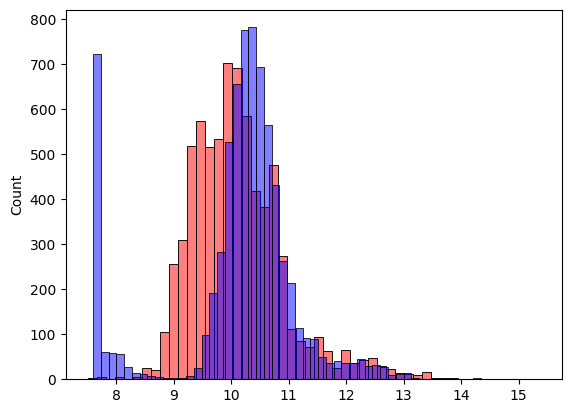

In [57]:
#alpha changes the transparency of the bars
#bins specify the number of bars
sns.histplot(y_pred,color='red',alpha=0.5,bins=50)
sns.histplot(y_train,color='blue',alpha=0.5,bins=50)

In [ ]:
# xi=[453,11,86]
# w0=7.17
# w=[0.01,0.04,0.002]

# # len(xi)


In [ ]:
# def linear_reg(xi):
#     pred = w0
#     n= len(xi)
#     for j in range(n):
#        pred = pred + w[j]*xi[j]
#       #  j+=1
#     return pred

In [ ]:
# linear_reg(xi)

12.312

In [ ]:
# log
# np.expm1(12.3)
# np.log1p(219694.9886721379)

np.float64(12.3)

2.6 - Linear Regression: Vector Form

In [ ]:
# Mental Note =>
#     n: feature size + 1 (for w0)
#     m: observation size

#    X is m*n
#    W is n*1
#    Preds is m*1

2.9 Root Mean Squared Error (RMSE)

In [58]:
def rmse(y,y_pred):
    se=(y-y_pred)**2
    mse=se.mean()
    return np.sqrt(mse)

In [59]:
rmse(y_train, y_pred)

np.float64(0.7454022686155632)

Validating the model

2.10 Computing RMSE on Validation data

In [60]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train=df_train[base].fillna(0).values
w0,w= train_linear_regression(X_train,y_train)
y_pred=w0 +X_train.dot(w)

In [61]:
#Implement the prepare_X function. The idea here is to provide the same way of preparing the dataset regardless of whether it’s train set, validation set, or test set.
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    #extracting the Numpy array
    X = df_num.values
    return X

In [62]:
#we can use this function when we prepare data for the training and for the validation as well.
#In the training part we only use training dataset to train the model.
#In the validation part we prepare the validation dataset the same way like before and apply the model. 
#Lastly we compute the rmse.

# Training part
X_train=prepare_X(df_train)
w0,w= train_linear_regression(X_train,y_train)

#validation part
X_val= prepare_X(df_val)
y_pred= w0+ X_val.dot(w)

# Evaluation part
rmse(y_val,y_pred)

np.float64(0.8227439505543979)

When we compare the RMSE from training with the value from validation (0.74540 vs. 0.8227) we see that the model performs similarly well on the seen and unseen data. 

2.12 Categorical Variables

Categorical variables are variables that are categories (typically strings)

Here: make, model, engine_fuel_type, transmission_type, driven_wheels, market_category, vehicle_size, vehicle_style But, there is one value that looks like numerical variable, but it isn’t. number_of_doors is not really a numerical number.

In [63]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [64]:
df_train.number_of_doors

8152    4.0
1671    4.0
9185    4.0
8519    4.0
3835    2.0
       ... 
8729    2.0
1705    4.0
6334    4.0
11      2.0
3463    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [65]:
df_train.number_of_doors == 2

8152    False
1671    False
9185    False
8519    False
3835     True
        ...  
8729     True
1705    False
6334    False
11       True
3463    False
Name: number_of_doors, Length: 7150, dtype: bool

Typical way of encoding such categorical variables is that we represent it with a bunch of binary columns – so called one-hot encoding. For each value we have a different column

We can imitate this encoding by turning the booleans from the last snippet into integers (1 and 0) and creating a new variable for each number of doors.

In [ ]:
df_train['num_doors_2']== (df_train.number_of_doors == 2).astype('int')
df_train['num_doors_3']== (df_train.number_of_doors == 3).astype('int')
df_train['num_doors_4']== (df_train.number_of_doors == 4).astype('int')

In [66]:
# But we can do this easier with string replacement.
'num_doors_%s'%4

'num_doors_4'

In [67]:
# With that replacement we can write a loop
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')
 
# We delete this because we'll use another solution
for v in [2, 3, 4]:
    del df_train['num_doors_%s' % v]

C:\Users\snigd\AppData\Local\Temp\ipykernel_12992\2820165483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')
C:\Users\snigd\AppData\Local\Temp\ipykernel_12992\2820165483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')
C:\Users\snigd\AppData\Local\Temp\ipykernel_12992\2820165483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [68]:
# Let’s use this string replacement method in our prepare_X function.
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X
 
prepare_X(df_train)

array([[345.,   8.,  19., ...,   0.,   0.,   1.],
       [185.,   6.,  24., ...,   0.,   0.,   1.],
       [ 95.,   4.,  24., ...,   0.,   0.,   1.],
       ...,
       [148.,   4.,  34., ...,   0.,   0.,   1.],
       [230.,   6.,  28., ...,   1.,   0.,   0.],
       [210.,   6.,  20., ...,   0.,   0.,   1.]], shape=(7150, 9))

In [ ]:
# When you look at the output of the last snippet you see at the end of each list there are three new items – one for each number of doors (2, 3, 4). Now we can check if the model performance has improved with the new features.
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

# We see in contrast to the last training with rmse of 0.518925210679331 there is only a slightly improvement, almost negligible so the number of doors feature is not that useful. Maybe the ‘Make’ information is more useful.

np.float64(0.5206308421864282)

In [ ]:
df.make.nunique()
# There are 48 unique values in the ‘Make’ column. That could be too much. Let’s look at the most popular ones.

48

In [71]:
df.make.value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [72]:
# If we want to get the actual values, we use the index property
df.make.value_counts().head().index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object', name='make')

In [73]:
# Wrap it in a usual Python list
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [74]:
# We can now adapt again our prepare_X function to add the new feature.
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
         
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [75]:
# Now we can use our new prepare_X function and train and validate again.
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.5206418230833567)

In [76]:
# The model performance has improved somewhat. Adding all the other categorical variables now This should improve the performance even more
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]
 
# The dictionary category will contain for each of the categories 
# the top 5 most common ones
categories = {}
 
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)
     
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [80]:
# The next snippet shows how to implement the new features to our prepare_X function. This time we need two loops as described inline.
def prepare_X(df):
    # this is good way to do, otherwise while using df you'll modify the original data
    # what is mostly not wanted
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
 
    # First loop is for each key of the dictionary categories.
    # Second loop is for each value inside the categories
    # For each of this values we create a new column.
    for c, values in categories.items():    
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [81]:
# Now we can train the model again and apply it to the validation data to see what is the model performance.
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(2460.40906986516)

In [ ]:
# This time the model performance is very bad. As you can see the RMSE is very large. So something went wrong. In the next article we’ll see why that has happened and how to fix it.

2.13  Regularization
Regularization as a way to solve the problem of duplicated columns in our data.

In [82]:
# reg = regularized
# parameter r = short for regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)
# np.float64(0.5105271574327789)

np.float64(0.5105271574327789)

2.14 Tuning the Model
The topic for this article is finding the best regularization parameter for our linear regression model. We realized that the parameter r affects the quality of our model and now we try to find the best value for this r.

In [84]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0.0 bias term:  -4.5956836426715936e+17 rmse:  2460.40906986516
reg parameter:  1e-05 bias term:  7.007421805541262 rmse:  0.5108587282383397
reg parameter:  0.0001 bias term:  6.771586454251205 rmse:  0.5108556252250344
reg parameter:  0.001 bias term:  6.7646358603316195 rmse:  0.5108256010376472
reg parameter:  0.01 bias term:  6.752199999118662 rmse:  0.5105271574327789
reg parameter:  0.1 bias term:  6.633717374904348 rmse:  0.5077122311720154
reg parameter:  1 bias term:  5.906877500279846 rmse:  0.48917683293941333
reg parameter:  10 bias term:  4.25583588501663 rmse:  0.4703084992245883


In [ ]:
# What you see here is using r=0 makes the bias term huge and the rmse score aswell. 0.001 could be a good parameter for r.
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
score = rmse(y_val, y_pred)
    
print("rmse: ",score)

# rmse:  0.5108256010376472

rmse:  0.5108256010376472


2.15 Using the Model
What we want to do now is to train our final model on both training dataset and validation dataset. We call this FULL TRAIN. After that we make the final evaluation on the test dataset to make sure that our model works fine and check what is the value for RMSE. It shouldn’t be too different from what we saw on the validation dataset.

Combining datasets
First step to do is getting our data. So we need to combine df_train and df_val into one dataset. We can use Pandas concat() function that takes a list of dataframes and concatenates them together

In [86]:
df_full_train = pd.concat([df_train, df_val])

In [87]:
# We also need to concatenate y_train and y_val to get y_full_train. This time we use the concatenate function of NumPy library.
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([10.42617257,  9.94611591,  7.60140233, ..., 10.32666159,
        7.60140233, 10.49060733], shape=(9532,))

Resetting index
Now we have again a coherent dataset for training and we can prepare it for the usage as we did before. The prepare_X() function still works fine.

In [88]:
X_full_train = prepare_X(df_full_train) 
X_full_train

array([[345.,   8.,  19., ...,   0.,   0.,   0.],
       [185.,   6.,  24., ...,   0.,   0.,   0.],
       [ 95.,   4.,  24., ...,   0.,   0.,   0.],
       ...,
       [300.,   6.,  30., ...,   0.,   0.,   0.],
       [130.,   5.,  22., ...,   0.,   0.,   0.],
       [210.,   4.,  29., ...,   0.,   1.,   0.]], shape=(9532, 41))

Train the final model
Next step is to train the final model on the combined dataset. We’re using the new train_linear_regression_reg() function to get the value for w0 and the vector w.

In [89]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0, w

(np.float64(6.325687125349355),
 array([ 1.54894108e-03,  1.11278031e-01, -6.58194456e-03, -8.10390287e-03,
        -5.50981787e-05, -9.73197445e-02, -6.52179568e-01, -7.84154852e-01,
        -5.13205140e-01, -3.53289002e-02,  1.98589227e-01, -3.61950373e-03,
        -8.58323262e-02, -8.60584113e-02, -4.48326607e-01,  1.08067888e-01,
        -2.90097539e-01, -5.26410039e-01, -4.46324534e-02,  1.02665714e+00,
         8.38153712e-01,  1.07894014e+00,  2.91732592e+00,  4.65078518e-01,
         1.63435189e+00,  1.52872066e+00,  1.61815796e+00,  1.54439018e+00,
        -9.00942806e-02,  4.80910562e-02, -7.03799839e-02, -1.53498418e-02,
        -2.16830959e-03,  2.18976180e+00,  2.07136720e+00,  2.06461094e+00,
        -2.29078067e-02,  6.18020577e-02,  1.88402486e-01,  3.47592083e-01,
        -1.46495552e-01]))

Applying model to test data
Now is the great moment for the final model. It must pass the final test. For this purpose we use test data, which are again prepared with the prepare_X() function. Then the model is applied to the test data and the RMSE can be calculated.

In [ ]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
 
score = rmse(y_test, y_pred)
    
print("rmse: ",score)

# rmse:  0.46188043931315453
# RMSE_test = 0.46188043931315453 is not so far away from RMSE_val =  0.5108256010376472  . That means the model generalizes quite well and it didn’t get this score by chance. Now we have our final model and we can use it. The way we want to use it is to predict the price of an (unseen) car – unseen means here that the model hasn’t seen this car during training.

rmse:  0.46188043931315453


Using the model
Using the model means:

Extracting all the features (getting feature vector of the car)
Applying our final model to this feature vector & predicting the price